In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [137]:
np.random.seed(437)

In [276]:
N=10000

In [277]:
T3=30.0

In [278]:
T2=20.0

In [297]:
NN=300

In [304]:
dt=T3/(NN+1)

In [305]:
MM = int(T2/dt)
print(MM)

200


In [306]:
i_bus = np.random.randint(0,MM,N)
#bus=T3*np.random.random_sample(N)

<AxesSubplot:ylabel='Count'>

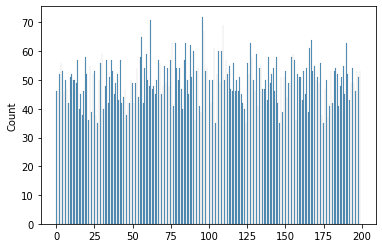

In [307]:
sns.histplot(data=i_bus,bins=2*MM)

In [308]:
i_me = np.random.randint(0,NN+1,N)
#me=T3*np.random.random_sample(N)

<AxesSubplot:ylabel='Count'>

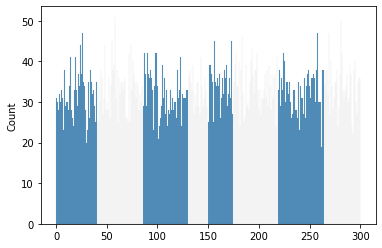

In [309]:
sns.histplot(data=i_me,bins=2*(NN+1))

In [310]:
i_me.shape

(10000,)

In [311]:
i_w=np.zeros((MM,),dtype=int)
c=0
for b in i_bus:
    bb = (b+MM)
    if bb > NN: bb = b - MM
    for m in i_me:
        #print(b,bb,"me",m)
        t1=b-m
        t2=bb-m
        t3= NN+1-m if m else 0
        #print(":",t1,t2,t3)
        if t1>=0 and t2>=0: i_w[min(t1,t2,t3)]+=1
        elif t2<0 and t1>=0: i_w[min(t1,t3)]+=1
        elif t1<0 and t2>=0: i_w[min(t2,t3)]+=1
        else: i_w[t3]+=1
        c+=1
    if c%1000000==0:
        print(f'{c*100.0/(N**2)}'+'%')
        #break

1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.0%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.0%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.0%
29.0%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.0%
56.0%
57.0%
58.0%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%
100.0%


In [312]:
wn=i_w/i_w.sum()

In [313]:
wn.sum()

1.0

In [314]:
pk2 = [(NN+MM-2*k)/(MM*(NN+1)) for k in range(MM)]

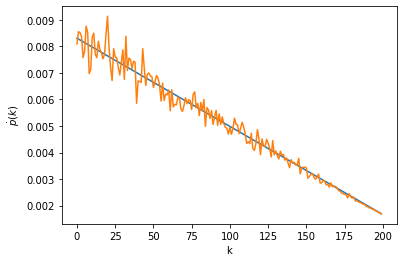

In [315]:
plt.xlabel("k")
plt.ylabel(r"$\dot{p}(k)$")
plt.plot(pk2)
plt.plot(wn)

In [316]:
ti =np.array([i*dt for i in range(MM)])

In [317]:
tmean=(wn*ti).sum()

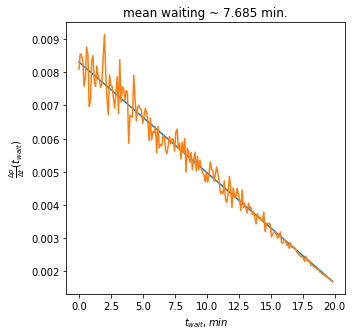

In [318]:
plt.figure(figsize=(5,5))
plt.title(f"mean waiting ~ {tmean:4.4} min.")
plt.xlabel(r"$t_{wait}, min$")
plt.ylabel(r"$\frac{\Delta p}{\Delta t}(t_{wait})$")
plt.plot(ti,pk2)
plt.plot(ti,wn)

In [319]:
(pk2*ti).sum()

7.709517554993875